# Python Scripting for Image Analysis
### ZFL, April 2017
#### Mort Canty
#### mort.canty@gmail.com  

The open-source programming language Python, together with the extensions Numpy, SciPy and GDAL, 
is an excellent platform for performing digital image analysis tasks on remote sensing imagery. 
This short course is intended to provide a basic familiarity with Python syntax and semantics, 
sufficient to allow students to write their own analysis programs in Python.

The topics covered will include:

    =  Installing a scientific Python environment (Anaconda2)
    
    =  Interactive development in Jupyter notebooks 
    
    =  Basic syntax, how to write and run a Python script
    
    =  Variables, functions, classes
    
    =  Importing modules, namespaces 
    
    =  Numpy (numerical Python), array-oriented programming
    
    =  Graphics with MatPlotLib (mathematical graphics library) 
    
    =  GDAL (Geospatial Data Abstraction Library), reading and writing imagery
    
    =  Parallel computing
    
    =  Integrated Development Environments: IDLE, Eclipse, IPython   
        
    =  Programming the Google Earth Engine with the Python API
    
    =  Web application programming
    
    =  Example scripts: PCA, Classification, Clustering, MAD ...

## Installing Anaconda2 and the Course Material

Go to https:#www.continuum.io/downloads and follow the instructions.

Go to https:#github.com/mortcanty/ZFLPython,  download the ZIP and unpack it to a convenient location.

CD into the subdirectory ZFLPython and run

**Jupyter Notebook**

from the command line. Open this Notebook 

**CourseNotebook.ipynb**.

### A scientific "Hello world!" in a Notebook cell

In [1]:
import math                               # importing standard Python modules
r = 5                                     # variable assignment
s = math.sin(r)                           # function call in namespace "math"
print 'Hello world! sin(%f) = %f' % (r,s) # print results to standard output

Hello world! sin(5.000000) = -0.958924


### Run the same program as a stand-alone Python script

In [2]:
%cd /home/mort/python/ZFLPython/src 
# Windows: %cd ...\ZFLPython\src

/home/mort/python/ZFLPython/src


In [3]:
%ls -l
# Windows: %dir

insgesamt 44
drwxrwxr-x 2 mort mort  4096 Apr 12 16:01 data/
-rw-rw-r-- 1 mort mort 17523 Feb 15 13:01 dispms.py
-rw-rw-r-- 1 mort mort  5196 Feb 15 13:01 pca.py
-rwxrwxr-x 1 mort mort   110 Apr 13 09:16 scientificHelloWorld.py*
drwxrwxr-x 2 mort mort  4096 Apr 12 13:30 templates/
-rw-rw-r-- 1 mort mort   789 Apr 12 13:30 webapp.py


In [6]:
%cat scientificHelloWorld.py 
# Windows: %type scientificHelloWorld.py

#!/usr/bin/env python
import sys, math
r = float(sys.argv[1])
s = math.sin(r)
print 'Hello world! sin(%f) = %f'%(r,s)

In [7]:
!./scientificHelloWorld.py 5 
# Windows (or Linux): !python scientificHelloWorld.py 5

Hello world! sin(5.000000) = -0.958924


### Python functions, file input/output, error catching

In [8]:
%cat data/table.txt

0.0 3.2
0.5 4.3
1.0 8.333
2.5 -0.25


In [10]:
def myfunc(y):
    if y >= 0.0:                  # statements are grouped by indentation
        return y**5*math.exp(-y)
    else:
        return 0.0

try:
    infilename = raw_input('enter a file name: ') # read from standard input
    ifile = open( infilename, 'r')
except:
    print 'Cannot read %s' % infilename
    sys.exit(1)
    
ofile = open( 'data/tableout.txt', 'w')    
    
for line in ifile:
    pair = line.split()
    x = float(pair[0]) ; y = float(pair[1])
    fy = myfunc(y)
    ofile.write('%f %12.5e\n' %(x,fy))
ifile.close()
ofile.close()

enter a file name: data/table.txt


In [11]:
%cat data/tableout.txt

0.000000  1.36775e+01
0.500000  1.99469e+01
1.000000  9.66120e+00
2.500000  0.00000e+00


### Collections: Lists, tuples and dictionaries

In [12]:
aList = [1,2,3,4]
aTuple = (1,2,3,4)
aDict = {'Name': 'Mort', 'Adresse': 'Heinsberger Str. 18', 'PLZ': 52428}

print aList[1]
print aTuple[1]
print aDict.keys()
print aDict['PLZ']

2
2
['Adresse', 'Name', 'PLZ']
52428


In [13]:
aList[1] = 0
print aList

[1, 0, 3, 4]


In [14]:
aTuple[1] = 0

TypeError: 'tuple' object does not support item assignment

### Object-oriented programming and inheritance

In [15]:
import math
class Vector():
    
    def __init__(self,x,y):
        self.x = x
        self.y = y

    def length(self):
        return math.sqrt(self.x**2+self.y**2)
    
v = Vector(1.0,2.0)

v.length()    

2.23606797749979

In [16]:
class ComplexNumber(Vector):
    
    def __init__(self,x,y):
        Vector.__init__(self,x,y)
        
    def real(self):
        return self.x
    
    def imag(self):
        return self.y
        
    def amplitude(self):
        return self.length()
        
    def phase(self):
        return math.degrees(math.atan(self.y/self.x))
    
v = ComplexNumber(1.,2.)

print v.imag()
print v.amplitude()
print v.phase()

2.0
2.2360679775
63.4349488229


### Array computing

In [9]:
import numpy as np
arr = np.array([0,1,2,3])   # crearing array from a list
print arr
print type(arr)

[0 1 2 3]
<type 'numpy.ndarray'>


In [10]:
print np.sqrt(arr)        # vector operations
print 2**arr

[ 0.          1.          1.41421356  1.73205081]
[1 2 4 8]


In [11]:
arr = np.random.rand(5,5)  # an array of random numbers
print arr

[[ 0.27560313  0.65484746  0.30487233  0.06209042  0.44741262]
 [ 0.18217443  0.67834654  0.8636275   0.11858538  0.10562695]
 [ 0.63096438  0.07308203  0.04547652  0.22238978  0.14423271]
 [ 0.05579012  0.58232803  0.31332157  0.26368771  0.15932711]
 [ 0.90138852  0.58385482  0.39187396  0.89379484  0.79977451]]


### Array slicing

In [12]:
print arr[0,0]
print arr[0]

0.275603125427
[ 0.27560313  0.65484746  0.30487233  0.06209042  0.44741262]


In [13]:
print arr[0,:]

[ 0.27560313  0.65484746  0.30487233  0.06209042  0.44741262]


In [14]:
print arr[0:2,:]

[[ 0.27560313  0.65484746  0.30487233  0.06209042  0.44741262]
 [ 0.18217443  0.67834654  0.8636275   0.11858538  0.10562695]]


In [15]:
print arr[[0,3,4],:]

[[ 0.27560313  0.65484746  0.30487233  0.06209042  0.44741262]
 [ 0.05579012  0.58232803  0.31332157  0.26368771  0.15932711]
 [ 0.90138852  0.58385482  0.39187396  0.89379484  0.79977451]]


In [16]:
print arr[[1,3],0:3]array

[[ 0.18217443  0.67834654  0.8636275 ]
 [ 0.05579012  0.58232803  0.31332157]]


In [17]:
print arr[-1,:]

[ 0.90138852  0.58385482  0.39187396  0.89379484  0.79977451]


In [18]:
print arr[0:5:2,:]

[[ 0.27560313  0.65484746  0.30487233  0.06209042  0.44741262]
 [ 0.63096438  0.07308203  0.04547652  0.22238978  0.14423271]
 [ 0.90138852  0.58385482  0.39187396  0.89379484  0.79977451]]


### Matrices and linear algebra

In [19]:
A = np.mat(arr[0:4,0:4]) # 2-D arrays can be typecasted to matrix objects
print A,'\n'
print A.T

[[ 0.27560313  0.65484746  0.30487233  0.06209042]
 [ 0.18217443  0.67834654  0.8636275   0.11858538]
 [ 0.63096438  0.07308203  0.04547652  0.22238978]
 [ 0.05579012  0.58232803  0.31332157  0.26368771]] 

[[ 0.27560313  0.18217443  0.63096438  0.05579012]
 [ 0.65484746  0.67834654  0.07308203  0.58232803]
 [ 0.30487233  0.8636275   0.04547652  0.31332157]
 [ 0.06209042  0.11858538  0.22238978  0.26368771]]


In [20]:
print A.I*A

[[  1.00000000e+00   0.00000000e+00  -5.55111512e-17   5.55111512e-17]
 [ -1.07552856e-16   1.00000000e+00   1.11022302e-16   2.77555756e-17]
 [  0.00000000e+00  -5.55111512e-17   1.00000000e+00   0.00000000e+00]
 [ -5.55111512e-17   0.00000000e+00   2.22044605e-16   1.00000000e+00]]


In [29]:
D = np.mat(np.random.randn(100,3))  # a data matrix 
print D[0:5,:]

[[ 0.02219738  0.81735284 -0.04078755]
 [-0.17829871 -0.20885385 -0.61835246]
 [-0.06066051  0.69384906 -0.136022  ]
 [-0.80643311  0.42525964  1.37196621]
 [ 0.61419903  0.13316368  1.21807108]]


In [30]:
C = D.T*D/99 # covariance matrix
print C

[[ 1.19973665  0.07648184  0.08546071]
 [ 0.07648184  0.91736285 -0.0331474 ]
 [ 0.08546071 -0.0331474   0.89364358]]


In [33]:
eigenvalues, eigenvectors = np.linalg.eigh(C) # eigenvalues and eigenvectors of a symmetric matrix
print eigenvalues, '\n'
print eigenvectors

[ 0.83459853  0.94030941  1.23583514] 

[[-0.29884711  0.02990048 -0.95383246]
 [ 0.57974863 -0.78823257 -0.20635148]
 [ 0.75801182  0.61465061 -0.21822626]]


In [32]:
for i in range(3):
    print eigenvectors[:,0].T*eigenvectors[:,i]

[[ 1.]]
[[ -2.22044605e-16]]
[[  5.55111512e-17]]


### Graphics

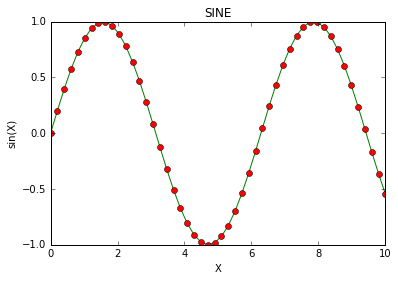

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
x = np.linspace(0,10,50)
y = np.sin(x)
plt.plot(x,y,'g',x,y,'ro')
plt.title('SINE')
plt.xlabel('X')
plt.ylabel('sin(X)')
plt.show()

### Imagery input/output: GDAL

GDAL stands for Geospatial Data Abstraction Library. It is not installed in Anaconda2 by default.

In [48]:
!conda install gdal

Fetching package metadata .........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/mort/anaconda2:
#
gdal                      2.1.0                    py27_0  


In [49]:
!conda list | grep gdal

gdal                      2.1.0                    py27_0  
libgdal                   2.1.0                         0  


There are several GDAL binaries that can be called from the command line, for example **gdalinfo**:

In [50]:
!gdalinfo --help

Usage: gdalinfo [--help-general] [-json] [-mm] [-stats] [-hist] [-nogcp] [-nomd]
                [-norat] [-noct] [-nofl] [-checksum] [-proj4]
                [-listmdd] [-mdd domain|`all`]*
                [-sd subdataset] [-oo NAME=VALUE]* datasetname


In [51]:
!gdalinfo 'data/20010525'

Driver: ENVI/ENVI .hdr Labelled
Files: data/20010525
       data/20010525.hdr
Size is 1000, 1000
Coordinate System is:
PROJCS["UTM Zone 31, Northern Hemisphere",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",3],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["Meter",1]]
Origin = (723116.250000000000000,5657264.250000000000000)
Pixel Size = (28.500000000000000,-28.500000000000000)
Metadata:
  Band_1=Resize (Band 1 Landsat ETM+:25-May-2001) (0.450000)
  Band_2=Resize (Band 2 Landsat ETM+:25-

#### Here is how to get raster imagery into a Python script:

In [52]:
from osgeo import gdal
from osgeo.gdalconst import GDT_Byte, GA_ReadOnly
gdal.AllRegister()
inDataset = gdal.Open('data/20010525',GA_ReadOnly)
cols = inDataset.RasterXSize    
rows = inDataset.RasterYSize  
bands = inDataset.RasterCount  
rasterBand1 = inDataset.GetRasterBand(1)
band1 = rasterBand1.ReadAsArray(0,0,cols,rows)
print np.shape(band1)

(1000, 1000)


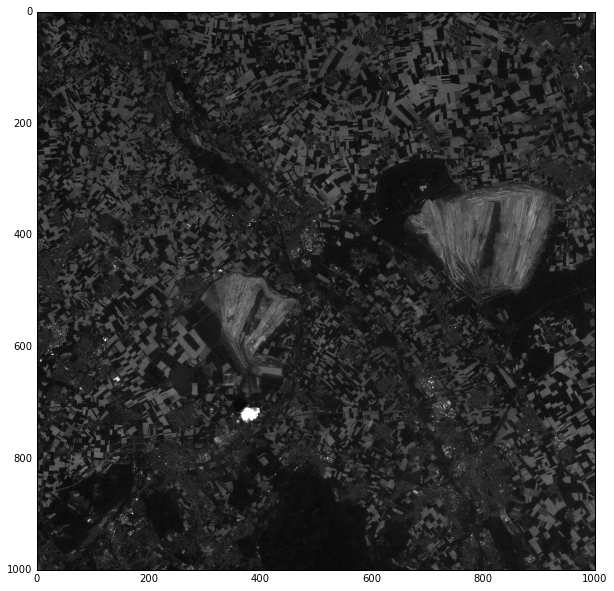

In [53]:
fig,ax = plt.subplots(figsize=(10,10)) 
ax.imshow(band1/255.,cmap='gray')
plt.show()

In [54]:
!python dispms.py -h


Usage: 
--------------------------------------

Display an RGB composite image

python dispms.py [OPTIONS] 

Options:

  -h       this help
  -f       image or left-hand image (if not specified, it will be queried)
  -F       right-hand image 
  -e -E    enhancements (1=linear255 2=linear 3=linear2pc 4=equalization 5=logarithmic (default)) 
  -p -P    RGB band position lists e.g. -p [1,2,3] 
  -d -D    spatial subset lists e.g. -d [0,0,200,200]
  -c -C    display as classification image
  -o alpha overlay left image onto right with opacity alpha
  -k       generate approximate KML overlay image
  
  -------------------------------------


In [55]:
!python dispms.py -f data/20010525 -e 3 -p [6,5,4]

GLib-GIO-Message: Using the 'memory' GSettings backend.  Your settings will not be saved or shared with other applications.


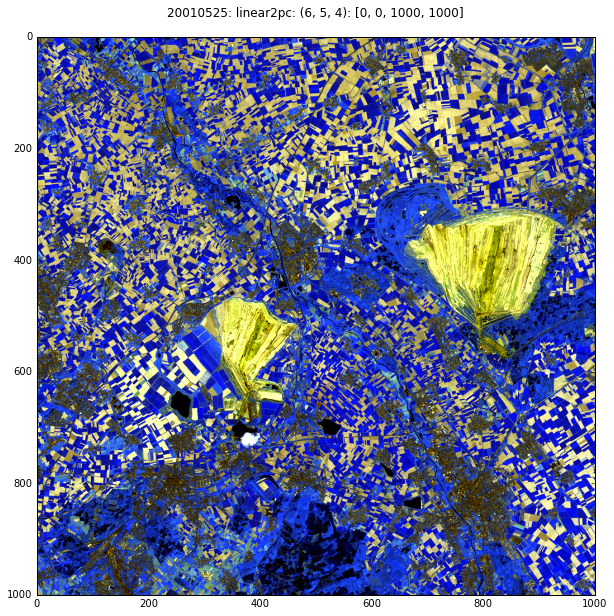

In [56]:
run dispms -f data/20010525 -e 3 -p [6,5,4]

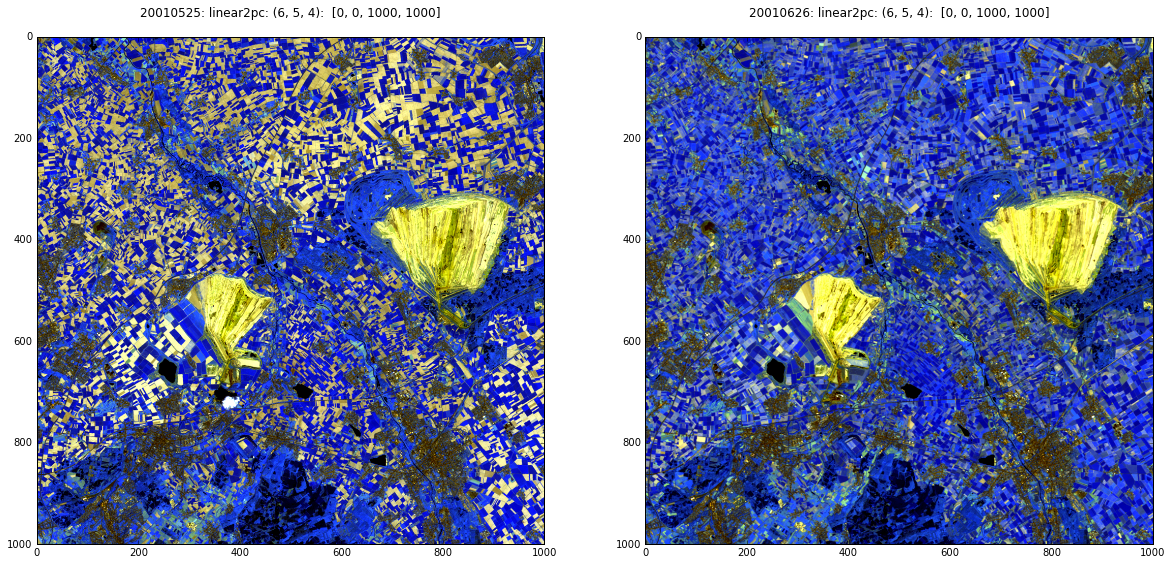

In [57]:
run dispms -f data/20010525 -e 3 -p [6,5,4] -F data/20010626 -E 3 -P [6,5,4]

### Example: Principal components

In [58]:
run pca -h

Usage: python pca.py [-h] [-r N] [-n] [-d dims] [-p pos] fileName

            spatial and spectral dimensions are lists, e.g., -d [0,0,400,400] 

            use -r N to reconstuct image with first N pcs, use -n to disable graphics output


------------PCA ---------------
Wed Apr 12 16:01:38 2017
Input data/20010525
Eigenvalues: [  6.53264847e+03   3.94881303e+02   1.39378715e+02   3.23104634e+01
   1.48719152e+01   3.02456833e+00]


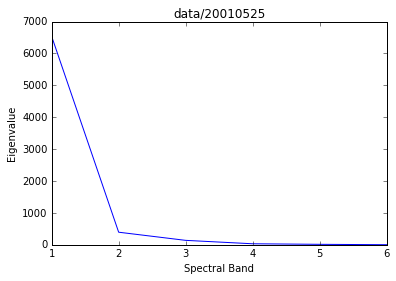

PCs written to: data/20010525_pca
Reconstruction writen to: data/20010525_recon
elapsed time: 0.552445888519


In [59]:
run pca -r 2 data/20010525

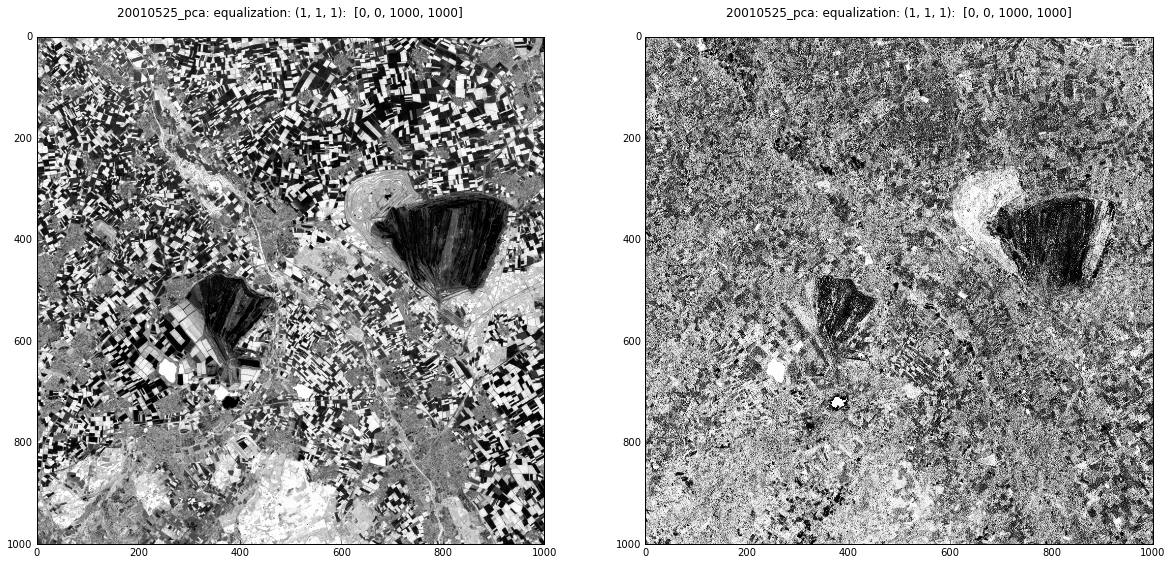

In [60]:
run dispms -f data/20010525_pca -p [1,1,1] -e 4 \
-F data/20010525_pca -P [6,6,6] -E 4

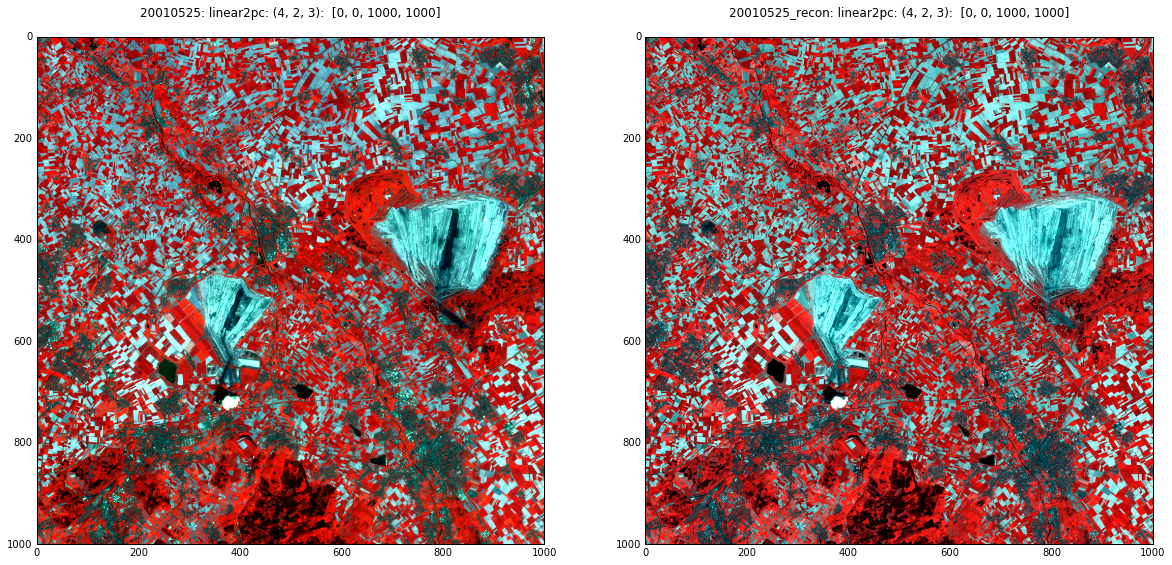

In [61]:
run dispms -f data/20010525 -p [4,2,3] -e 3 \
-F data/20010525_recon -P [4,2,3] -E 3

### Parallel computing (ipyparallel)

https://ipyparallel.readthedocs.io/en/latest/

In [ ]:
from ipyparallel import Client

In [ ]:
from ipyparallel import Client
c = Client()
print c.ids
v = c[:]

In [ ]:
def func(x):
    import os
    import numpy as np
    return (os.getpid(),np.log(x))

print map(func,range(1,10))
print v.map_sync(func,range(1,10))

#### Example: Co-registration of a sequence of SAR images (sar_seq.py)

## Alternative development environments

###  - IDLE
### - Eclipse/Pydev

## The Google Earth Engine Python API

https://developers.google.com/earth-engine/

https://developers.google.com/earth-engine/python_install

In [ ]:
%cd /home/mort/python/earthengine/src

### Accessing the data catalogue

In [ ]:
import ee, time

ee.Initialize()

try:
    point = ee.Geometry.Point([8.5,50.0]) 
    start = ee.Date('2016-05-01')
    finish = ee.Date('2016-08-01')    
    collection = ee.ImageCollection('COPERNICUS/S2') \
                .filterBounds(point) \
                .filterDate(start, finish) \
                .sort('CLOUD_COVERAGE_ASSESSMENT', True)
    count = collection.toList(100).length().getInfo()
    if count==0:
        raise ValueError('No images found')   
    image = ee.Image(collection.first()) 
    timestamp = ee.Date(image.get('system:time_start')).getInfo()
    timestamp = time.gmtime(int(timestamp['value'])/1000)
    timestamp = time.strftime('%c', timestamp) 
    systemid = image.get('system:id').getInfo()
    cloudcover = image.get('CLOUD_COVERAGE_ASSESSMENT').getInfo()
    projection = image.select('B2').projection().getInfo()['crs']    
    print 'system id: %s'%systemid
    print 'acquisition time: %s'%timestamp
    print 'cloud cover (percent):%s'%cloudcover
    print 'projection: %s'%projection
except Exception as e:
    print 'An error occurred: %s'%e

### Exporting data

In [ ]:
maxLat = 50.06526459341422
minLon = 8.477334975832491
minLat = 50.01013697421883
maxLon = 8.633890151613743
rect = ee.Geometry.Rectangle(minLon,minLat,maxLon,maxLat)
exportname = 'users/mortcanty/'+systemid.replace('/','-')
assexport = ee.batch.Export.image.toAsset(image.clip(rect).select('B2','B3','B4','B8'),
                                          description='assetExportTask', 
                                          assetId=exportname,scale=10,maxPixels=1e9)
assexportid = str(assexport.id)
print '****Exporting to Assets, task id: %s '%assexportid
assexport.start() 

### Reducers

In [ ]:
# Image.reduceRegion example
#
# Computes a simple reduction over a region of an image.  A reduction
# is any process that takes an arbitrary number of inputs (such as
# all the pixels of an image in a given region) and computes one or
# more fixed outputs.  The result is a dictionary that contains the
# computed values, which in this example is the maximum pixel value
# in the region.
#
# This example shows how to print the resulting dictionary to the
# console, which is useful when developing and debugging your
# scripts, but in a larger workflow you might instead use the
# Dicitionary.get() function to extract the values you need from the
# dictionary for use as inputs to other functions.

import ee

ee.Initialize()

# The input image to reduce, in this case an SRTM elevation map.
image = ee.Image('srtm90_v4')

# The region to reduce within.
poly = ee.Geometry.Rectangle(-109.05, 41, -102.05, 37)

# Reduce the image within the given region, using a reducer that
# computes the max pixel value.  We also specify the spatial
# resolution at which to perform the computation, in this case 200
# meters.
max = image.reduceRegion(ee.Reducer.max(), poly, 200)

# Print the result to the console.
print max.getInfo()


### Iteration

In [ ]:
# Pure Python

sum = 0
for i in range(10):
    sum += i
print sum    

In [ ]:
# numpy

print np.array(range(10)).sum()

In [ ]:
# ee Python API

import ee
ee.Initialize()

def sum(current,prev):
    prev = ee.Number(prev)
    return prev.add(current)

input = ee.List.sequence(0,9)
first = ee.Number(0)
result = input.iterate(sum,first)
print result

In [ ]:
print result.getInfo()

### Web application programming

In [ ]:
%cd /home/mort/python/ZFLPython/src

In [ ]:
!cat webapp.py

In [ ]:
run webapp